# 02 - Customer Segmentation using KMeans Clustering

In this notebook, we perform customer segmentation using the KMeans clustering algorithm. We will determine the optimal number of clusters, train the model, assign cluster labels, and visualize the segmented customers.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../data/Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
X = df[["Age","Annual Income (k$)", "Spending Score (1-100)"]]

In [50]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [54]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. Elbow Method Implementation

We train KMeans models with different numbers of clusters (k=1 to 10) and record their inertia values. Inertia is the sum of squared distances from each point to its assigned cluster center. By plotting these values, we can observe the "elbow point" — a value of k where adding more clusters yields diminishing returns.


In [67]:
from sklearn.cluster import KMeans

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    

### Elbow Method Plot

The plot above shows the inertia values for different numbers of clusters. The "elbow" is the point where the inertia begins to decrease at a slower rate. This point suggests an optimal value for k, as adding more clusters beyond it provides diminishing returns.


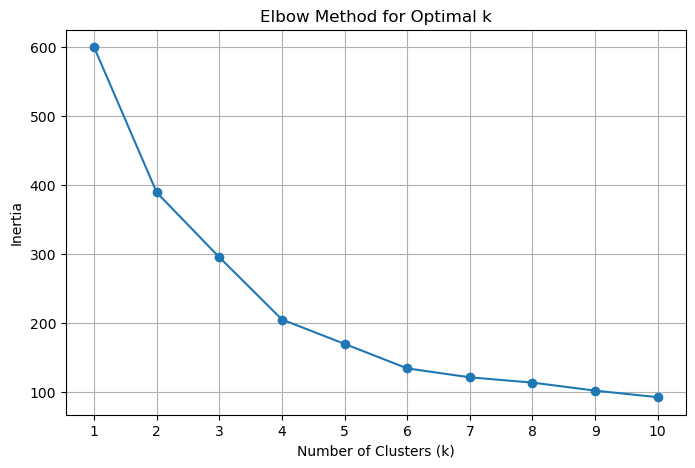

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig("../images/elbow_method_for_optimal_k")
plt.show()

### Elbow Method Result

Based on the Elbow Method plot, the optimal number of clusters appears to be 5. This is the point where the inertia begins to decrease at a much slower rate, indicating that adding more clusters beyond this point provides diminishing returns in terms of reducing within-cluster variance.


## 3. Customer Segmentation using KMeans

Using the optimal number of clusters determined earlier, we now apply the KMeans clustering algorithm to segment customers. The resulting cluster labels will be added to the original dataset for further analysis and visualization.


In [105]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
labels = kmeans.labels_
X["Cluster"] = kmeans.labels_


In [107]:
X.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


## 4. Cluster Profiles and Summary Statistics

After assigning each customer to a cluster, we now examine the average characteristics of each group. This allows us to understand the distinct profiles of different customer segments and tailor strategies accordingly.


In [109]:
X.groupby("Cluster").mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


In [111]:
df["Cluster"].value_counts().sort_index()

Cluster
0    58
1    40
2    26
3    45
4    31
Name: count, dtype: int64

In [113]:
df.groupby("Cluster")["Genre"].value_counts(normalize=True)

Cluster  Genre 
0        Female    0.568966
         Male      0.431034
1        Female    0.550000
         Male      0.450000
2        Female    0.576923
         Male      0.423077
3        Female    0.600000
         Male      0.400000
4        Male      0.516129
         Female    0.483871
Name: proportion, dtype: float64

## 5. Visualizing Clusters using PCA

To better understand how the customers are segmented, we reduce the feature space to two dimensions using Principal Component Analysis (PCA). The resulting scatter plot shows how well-separated the clusters are in this lower-dimensional representation.


In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_components = pca.fit_transform(X_scaled)

In [142]:
pca_components.shape

(200, 2)

### Creating a PCA-transformed DataFrame

The PCA-transformed 2D data is now stored in a new DataFrame. Each row represents a customer projected into a two-dimensional space, along with their assigned cluster label.


In [146]:
pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])

pca_df["Cluster"] = X["Cluster"].values

In [148]:
pca_df.head()

,PCA1,PCA2,Cluster
0,-0.615720,-1.763481,2
1,-1.665793,-1.820747,2
2,0.337862,-1.674799,3
3,-1.456573,-1.772430,2
4,-0.038465,-1.662740,2


## 6. Visualizing Customer Segments with PCA

The following scatter plot displays the customers in a 2D PCA-transformed space, with colors indicating cluster assignments. This helps us visually assess how well-separated the customer segments are after applying KMeans.


### PCA Scatter Plot of Customer Clusters

The plot above shows customer segmentation based on PCA-transformed features. Each point represents a customer, colored by their assigned cluster. Most clusters appear to be well-separated, indicating that the KMeans algorithm was able to effectively distinguish customer groups based on age, income, and spending score.


### Analysis of PCA-Based Customer Clusters

The PCA scatter plot displays each customer in a 2D space, where each point is color-coded by its assigned cluster.

- **Overall Separation:** Most clusters are well-separated, indicating that KMeans successfully identified distinct customer segments based on the input features (Age, Income, Spending Score).
- **Cluster Compactness:** Some clusters, such as Cluster 2 (green), are tightly grouped, suggesting a group of customers with very similar characteristics. Others, like Cluster 4 (orange), are more dispersed, potentially indicating internal variation within the group.
- **Mild Overlap:** There appears to be some overlap between Cluster 3 (purple) and Cluster 0 (red), possibly due to information loss during PCA's dimensionality reduction.
- **Asymmetric Distributions:** The clusters vary in shape and spread, which implies meaningful and diverse customer behavior patterns.

This analysis supports the idea that customer segmentation using KMeans and the selected features is effective. It provides a strong basis for further business decisions such as targeted marketing or personalized recommendations.


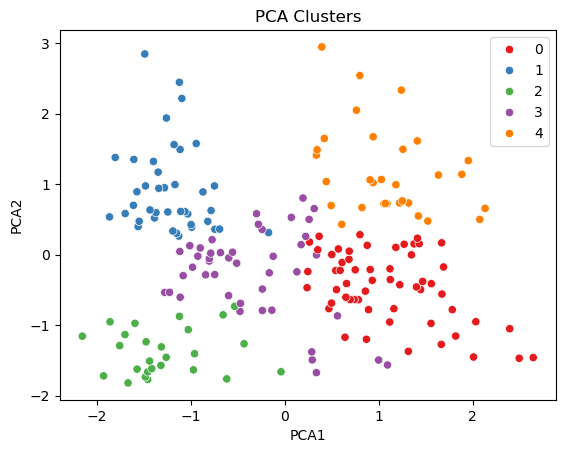

In [153]:
import seaborn as sns

sns.scatterplot(x="PCA1", y="PCA2", data=pca_df, hue="Cluster", palette="Set1")
plt.title("PCA Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.savefig("../images/pca_clusters.png")
plt.show()

## 7. Visualizing Clusters using t-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique. Unlike PCA, t-SNE is designed to preserve local similarities, making it useful for visualizing clusters that are not linearly separable.


In [160]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)


In [162]:
tsne_df = pd.DataFrame(tsne_components, columns=["TSNE1", "TSNE2"])
tsne_df["Cluster"] = X["Cluster"].values

### t-SNE Cluster Visualization

The t-SNE scatter plot displays a 2D nonlinear projection of the customer data, color-coded by cluster assignments.

- **Cluster Separation:** The clusters are very well separated, especially Cluster 1 (blue) and Cluster 4 (orange), which show minimal overlap with others. This indicates that those customer groups have distinct behavioral patterns.
- **Low Overlap:** Compared to PCA, t-SNE provides a cleaner visual separation of clusters, particularly helpful for exploring non-linear relationships.
- **Cluster Spread:** Some clusters, like Cluster 0 (red), are more spread out, possibly indicating more internal variability.

Overall, the t-SNE visualization validates the KMeans clustering and reveals insightful segmentation of the customer base.


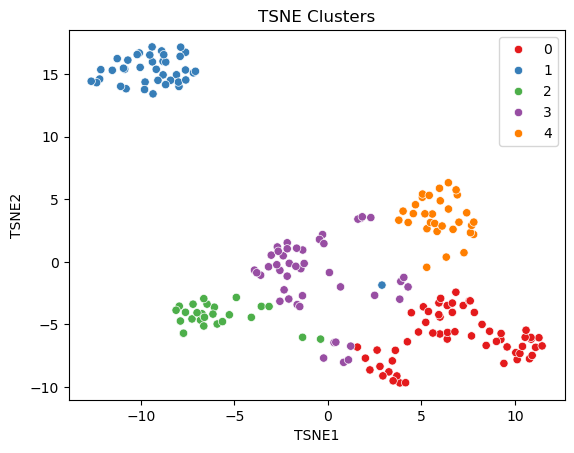

In [166]:
sns.scatterplot(x="TSNE1", y="TSNE2", data=tsne_df, hue="Cluster", palette="Set1")
plt.title("TSNE Clusters")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend()
plt.savefig("../images/tsne_clusters.png")
plt.show()

## 8. Conclusion

In this project, we successfully performed customer segmentation using KMeans clustering. By leveraging three key features — Age, Annual Income, and Spending Score — we were able to group 200 mall customers into 5 distinct clusters.

Key outcomes:

- The Elbow Method suggested that 5 clusters provide an optimal balance between model complexity and performance.
- PCA and t-SNE visualizations confirmed that most clusters are well-separated, with clear behavioral distinctions among customer groups.
- The clusters revealed useful patterns, such as:
  - High spenders with low income (potential for upselling)
  - Low spenders with high income (potential churn risk)
  - Young, high-scoring customers (possibly trend-driven)
  - Older, low-scoring customers (less responsive to marketing)

**Business Implications:**

- Marketing strategies can be tailored to each cluster’s characteristics.
- Personalized promotions can be offered to high-potential customers.
- Low-engagement clusters may benefit from loyalty programs or retention campaigns.

This analysis provides a data-driven foundation for customer relationship management and strategic targeting in retail environments.
